In [114]:
# Installing the necessary packages:
# Packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns  # visualizations

In [115]:
ds = pd.read_parquet("sputnikSentimentComplete.parquet.snappy", engine="fastparquet")

In [116]:
ds.head()

,link,Sentiment_Comments,Polarity_Comments,title,author,date,text,comments,Sentiment_Articles,Polarity_Articles
index,,,,,,,,,,
0,/20230501/watch-russian-army-sappers-blow-up-a...,NaN,NaN,Watch Russian Army Sappers Blow Up Abandoned Ammo,Oleg Burunov https://cdn1.img.sputnikglobe.com...,01/05/23,The Russian Ministry of Defense (MoD) has rele...,[],-0.229400,Negative
1,/20230501/kiev-lost-over-300-soldiers-over-pas...,-0.14985,Negative,Kiev Lost Over 300 Soldiers Over Past 24 Hours...,Sputnik International,01/05/23,"""Over the past day, the aviation carried out s...",[330 US mercenaries with mostly Ukrainian pass...,-0.325667,Negative
3,/20230430/russia-destroys-up-to-200-tonnes-of-...,-0.31845,Negative,Russia Destroys Up to 200 Tons of Ukrainian Am...,Sputnik International,30/04/23,"""As a result of a strike on an echelon at a ra...",[Very soon they will only have stones to throw...,-0.145350,Negative
5,/20230430/russian-forces-discover-underground-...,0.13190,Positive,Russian Forces Discover Underground Soledar Ar...,Oleg Burunov https://cdn1.img.sputnikglobe.com...,30/04/23,The Armed Forces of Ukraine failed in its effo...,[Kudos to the Russian explosive ordnance dispo...,-0.569680,Negative
7,/20230430/ukraine-loses-over-480-military-merc...,NaN,NaN,"Ukraine Loses Over 480 Military, Mercenaries i...",Sputnik International,30/04/23,"""Over the past 24 hours, over 480 Ukrainian se...",[],-0.701975,Negative


In [117]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   link                1615 non-null   object  
 1   Sentiment_Comments  600 non-null    float64 
 2   Polarity_Comments   600 non-null    category
 3   title               1615 non-null   object  
 4   author              1615 non-null   object  
 5   date                1615 non-null   object  
 6   text                1615 non-null   object  
 7   comments            1615 non-null   object  
 8   Sentiment_Articles  1615 non-null   float64 
 9   Polarity_Articles   1615 non-null   category
dtypes: category(2), float64(2), object(6)
memory usage: 116.8+ KB


In [118]:
ds["date"] = pd.to_datetime(ds["date"], format="%d/%m/%y")

In [119]:
colors = {"Negative": "#f40000", "Neutral": "#707070", "Positive": "#00d600"}

The distribution of positive and negative here is the same for comments and the text of the article, for this topic was expected this outcome.

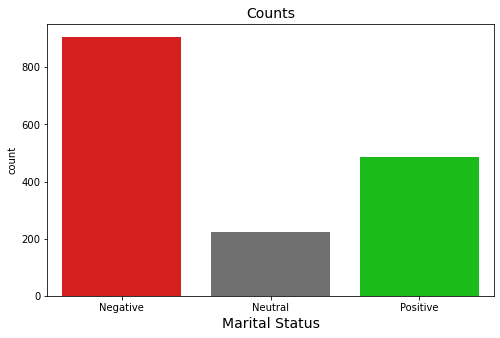

In [120]:
# Visualising distribution of categorical variables
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
_ = sns.countplot(x="Polarity_Articles", data=ds, palette=colors)
_ = plt.xlabel("Marital Status", fontsize=14)
_ = plt.title("Counts", fontsize=14)

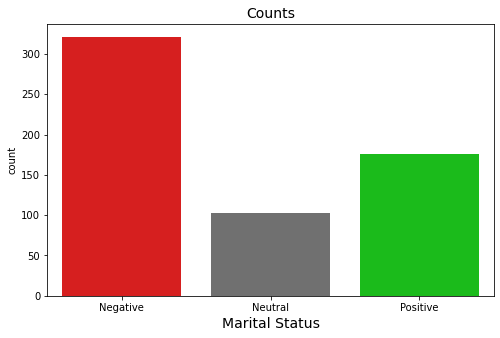

In [121]:
# Visualising distribution of categorical variables
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
_ = sns.countplot(x="Polarity_Comments", data=ds, palette=colors)
_ = plt.xlabel("Marital Status", fontsize=14)
_ = plt.title("Counts", fontsize=14)

Now let's see what happend when there is a different polarity between comments and articles.  
As we can see positive comments are supporting Russia while negatives are against Ukrainian allies. Talking about the sentiment analysis of the articles the analysis of the sentiment an article that talk about losses is classified negative and one talking about winning are classified positive. In this case the fact that one article is positive or negative doesn't mean that is talking about Russia or Ukraine, because it can be that is talking about a Russian win or Ukrainian one but still is a win so is classified positive.

In [122]:
ds.query("Polarity_Articles == 'Negative' & Polarity_Comments == 'Positive'")

,link,Sentiment_Comments,Polarity_Comments,title,author,date,text,comments,Sentiment_Articles,Polarity_Articles
index,,,,,,,,,,
5,/20230430/russian-forces-discover-underground-...,0.131900,Positive,Russian Forces Discover Underground Soledar Ar...,Oleg Burunov https://cdn1.img.sputnikglobe.com...,2023-04-30,The Armed Forces of Ukraine failed in its effo...,[Kudos to the Russian explosive ordnance dispo...,-0.569680,Negative
14,/20230429/moscow-ukraine-loses-nearly-600-mili...,0.060050,Positive,"Ukraine Loses Nearly 600 Military, Mercenaries...",Sputnik International,2023-04-29,"""Total enemy losses in this direction amounted...","[Well done, Russia and Good luck for the final...",-0.282700,Negative
30,/20230426/moscow-west-intends-to-turn-ukraine-...,0.098075,Positive,Moscow: West Intends to Turn Ukraine Into 'Rad...,Svetlana Ekimenko,2023-04-26,"The United Kingdom will not be able to ""get of...","[Again, Putin cries, but does nothing to stop ...",-0.296457,Negative
33,/20230426/russia-investigating-crimes-of-frenc...,0.152560,Positive,Russia Investigating Crimes of French Mercenar...,Sputnik International,2023-04-26,"""The Russian Investigative Committee will inve...",[I hope these ( bande de fasciste et neo Nazi)...,-0.467180,Negative
35,/20230425/uk-gave-ukraine-thousands-of-shells-...,0.121000,Positive,"UK Gave Ukraine Thousands of Shells, Including...",Sputnik International,2023-04-25,"""We have sent thousands of rounds of Challenge...",[I hope Russia return this atomic waste to sen...,-0.416500,Negative
...,...,...,...,...,...,...,...,...,...,...
1162,/20220812/live-updates-razoni-cargo-ship-movin...,0.440400,Positive,LIVE UPDATES: US Army Deploying Roughly 260 So...,Sputnik International,2022-08-12,Russian armed forces and the allied militia gr...,[russia is holding the world hostage by using ...,-0.177900,Negative
1163,/20220811/moscow-slams-kievs-shelling-of-zapor...,0.204360,Positive,Moscow Slams Kiev's Shelling of Zaporozhye NPP...,Oleg Burunov https://cdn1.img.sputnikglobe.com...,2022-08-11,"Ivan Nechaev, deputy director of the Informati...",[The most sensible act is for Russia to declar...,-0.654150,Negative
1169,/20220810/live-updates-ukrainian-forces-shell-...,0.134150,Positive,LIVE UPDATES: EU Discussing Ban on Issuance of...,Sputnik International,2022-08-10,While Russian armed forces and the allied mili...,"[You're just not getting it, the sanction is n...",-0.400800,Negative


In [123]:
ds.query("Polarity_Articles == 'Negative' & Polarity_Comments == 'Positive'").iloc[
    0
].text

'The Armed Forces of Ukraine failed in its efforts to blow up underground warehouses with Soviet\xad-made weapons in the salt mines near Soledar before leaving the town, an unnamed Russian soldier told Sputnik.He said that the depots were located in the nearby village of Paraskoviyevka, and that Ukrainian troops planted incendiary explosives at the warehouses to completely destroy the facilities.However, the incendiary bombs were connected incorrectly, which is why there were no explosions in the warehouses.“They made a mistake when connecting the bombs, so there was only a blast on the surface, with the depots themselves remaining intact,” he said, referring to 4.5 tons of TNT that sappers detected in the salt mines.The soldier also said that a lot of small arms and ammunition are still in place in the depots."There are 292,000 boxes with the PPShs, [the most common Soviet submachine gun of the Second World War]. Each box contains ten such small arm pieces, so you can imagine the volu

In [124]:
ds.query("Polarity_Articles == 'Negative' & Polarity_Comments == 'Positive'").iloc[
    0
].comments

['Kudos to the Russian explosive ordnance disposal team for going through "The Hurt Locker" routine but for real, not as a movie. That IMO  is the true measure of undaunted selflessness on behalf of the Motherland.',
 "Thats 1,292,000 or 1.2 million 'Papasha' sub machine guns, enough to start a revolution, if there is ammunition in bulk."]

In [125]:
ds.query("Polarity_Articles == 'Negative' & Polarity_Comments == 'Positive'").iloc[
    1
].text

'"Total enemy losses in this direction amounted to more than 575 Ukrainian servicepeople and mercenaries, two tanks, three infantry fighting vehicles, two armored fighting vehicles, twelve vehicles, two self-propelled artillery units Akatsiya and Gvozdika, one D-30 howitzer, and two US-made AN/TPQ-50 counter-battery radars," the ministry said. Over the past 24 hours, the Russian aviation made seven combat sorties and artillerymen carried out 58 firing missions in the Donetsk direction and near Artemovsk, the ministry said.Russia launched its special military operation in Ukraine in February 2022, after the Donetsk and Lugansk people’s republics appealed for help in defending themselves against Ukrainian provocations. In response to Russia’s operation, Western countries have rolled out a comprehensive sanctions campaign against Moscow and have been supplying weapons to Ukraine.'

In [126]:
ds.query("Polarity_Articles == 'Negative' & Polarity_Comments == 'Positive'").iloc[
    1
].comments

['Well done, Russia and Good luck for the final victory !',
 'i guess the nato training these ukranian forces got did not include the message "try not to get yourself killed".']

We can see that when we have positive comments and negative articles when is about a battle winned by Russian, so people on the comments are happy while the sentiment of the text is negative.  
Now let's see what happen whe articles are positive and the comments are negative.

In [127]:
ds.query("Polarity_Articles == 'Positive' & Polarity_Comments == 'Negative'")

,link,Sentiment_Comments,Polarity_Comments,title,author,date,text,comments,Sentiment_Articles,Polarity_Articles
index,,,,,,,,,,
37,/20230424/kremlin-spokesman-confirms-his-eldes...,-0.949000,Negative,Kremlin Spokesman Confirms His Eldest Son Took...,Sputnik International,2023-04-24,"Last week, the head of Wagner Group private mi...","[Meanwhile, ""sons"" (we never know that for sur...",0.241771,Positive
63,/20230421/canada-to-provide-ukraine-with-new-m...,-0.457833,Negative,Canada to Provide Ukraine With New Military Ai...,Sputnik International,2023-04-21,“Minister Anand announced that Canada is provi...,[if canada cares so much about the territorial...,0.274450,Positive
67,/20230421/ukrainian-forces-attempt-to-use-chem...,-0.248725,Negative,Ukrainian Forces Attempt to Use Chemical Subst...,Sputnik International,2023-04-21,"""[Ukrainian forces] tried to use an unknown su...",[at the instruction of nato headquarters of co...,0.252567,Positive
73,/20230420/spains-new-military-aid-for-ukraine-...,-0.453367,Negative,Spain's New Military Aid for Ukraine to Includ...,Sputnik International,2023-04-20,"""The new shipments are aimed at reinforcing th...",[i guess the spanish are really dumb. when are...,0.121140,Positive
159,/20230330/russia-conveys-to-iaea-its-vision-on...,-0.653500,Negative,Russia Conveys to IAEA Its Vision on Functioni...,Sputnik International,2023-03-30,"""We have our preferences and our vision of how...","[As usual, any proposal coming from Russia wil...",0.598600,Positive
...,...,...,...,...,...,...,...,...,...,...
1148,/20220816/live-updates-five-ships-carrying-agr...,-0.389150,Negative,UPDATES: Kiev Cannot Guarantee Safe Passage of...,Sputnik International,2022-08-16,As the Russian army and allied forces of the D...,[Mostly livestock feed which is by far the m m...,0.089900,Positive
1150,/20220815/new-zealand-send-troops-to-train-ukr...,-0.096811,Negative,New Zealand Sends Troops to Train Ukrainians t...,Ilya Tsukanov,2022-08-15,New Zealand will deploy an additional 120 troo...,[You can lead Jacinta to war but you cannot ma...,0.362233,Positive
1171,/20220809/live-updates-donetsk-republic-shelle...,-0.364433,Negative,LIVE UPDATES: Ukraine May Open Bayraktar Drone...,Sputnik International,2022-08-09,Russian armed forces and Donbass Republics for...,[The turkish goat molester in chief will conti...,0.361200,Positive


In [128]:
ds.query("Polarity_Articles == 'Positive' & Polarity_Comments == 'Negative'").iloc[
    2
].text

'"[Ukrainian forces] tried to use an unknown substance with the help of drones. Our fighters quickly responded — there were no serious injuries, one soldier received a chemical burn," Rogov wrote on Telegram.Earlier in the day, Russian Defense Ministry said that Ukraine has lost up to 310 military in the Donetsk direction over the past 24 hours.In February 2022, Russia launched a special military operation in Ukraine in response to requests by the Donetsk and Lugansk people\'s republics to help defend them from intensifying attacks by Ukrainian troops. Russia has said the operation aims to demilitarize and de-Nazify Ukraine and to completely liberate the Donbas region.The countries of the US-led collective West have imposed comprehensive sanctions on Russia and have also provided Ukraine with military and financial aid'

In [129]:
ds.query("Polarity_Articles == 'Positive' & Polarity_Comments == 'Negative'").iloc[
    2
].comments

['at the instruction of nato headquarters of course. do not forget who brought many nazi scientist to south america? yep the usa and fake white askinazi jews living in isreael now',
 "Russia has to close Ukraine's airspace in order to identify and destroy all arms shipments as soon as they enter Ukrainian territory."]

In [130]:
ds.query("Polarity_Articles == 'Positive' & Polarity_Comments == 'Negative'").iloc[
    1
].text

'“Minister Anand announced that Canada is providing a new military aid package for Ukraine. This assistance includes A $34.6 million contribution to the North Atlantic Treaty Organization (NATO) Ukraine Comprehensive Assistance Package (CAP) Trust Fund ... Approximately $2.5 million for 40 .50 caliber sniper rifles and ammunition from Prairie Gun Works based in Winnipeg, which includes spare parts and accessories. Approximately $2 million worth of new radio sets (16 in total) from L3 Harris to accompany the Leopard 2 tank donations,” the National Defense statement reads. Accordingly, the C$34 million will allow the implementation of NATO’s CAP fuel material project, which seeks to provide Ukraine with 3.3 million liters of fuel. Part of the funds will go to implement the NATO CAP Improved Ribbon Bridge project, the statement said, which consists in providing Ukraine with modular flotation bridges, and allows for wet-gap crossing. The announced funding will also mark Canada’s first cont

In [131]:
ds.query("Polarity_Articles == 'Positive' & Polarity_Comments == 'Negative'").iloc[
    1
].comments

['if canada cares so much about the territorial  integrity and sovereignty of other countries why are they not sending $30 million to the arab republic of syria to fight off the invasion by american troops? so canadians show themselves as two faced liars again',
 "The USA is in recession but they are managing to balance their economy thanks to the war in Ukraine, forcing these countries to comply with US policy, and putting the economy of these countries in recession, these countries need to stop obeying the USA and stop providing aid to Ukraine and think more about its people who are already in need. if there is an escalation of the war, the countries that will be destroyed will be the European ones, because the USA is protected by the Atlantic and Pacific Oceans. Stop sending weapons to Ukraine. Russia needs to close Ukraine's airspace to identify and destroy all arms shipments once they enter Ukrainian territory."]

Neutral articles apperently are not talking about thing happend in the war field, these are things like statements which aren't neither positive or negative.

In [132]:
ds.query("Polarity_Articles == 'Neutral'")

,link,Sentiment_Comments,Polarity_Comments,title,author,date,text,comments,Sentiment_Articles,Polarity_Articles
index,,,,,,,,,,
23,/20230428/us-setting-up-sensors-across-ukraine...,-0.299708,Negative,US Setting Up Sensors Across Ukraine to Detect...,Sputnik International,2023-04-28,"In a statement for the newspaper, the Nuclear ...","[To quote General Akbar: ""It's a trap!"" Those...",-0.024129,Neutral
46,/20230422/ukrainian-top-official-calls-on-alli...,-0.350162,Negative,Ukrainian Top Official Calls on Allies to Cros...,Sputnik International,2023-04-22,"""We are thankful to our allies for their milit...",[are they getting a little desperate and reali...,-0.025686,Neutral
48,/20230422/spain-to-send-ukraine-6-leopard-2a4-...,-0.692720,Negative,Spain to Send Ukraine 6 Leopard 2A4 Tanks in N...,Sputnik International,2023-04-22,Albares added that the remaining four tanks wo...,[most people already know spanish are dumb as ...,0.022000,Neutral
57,/20230421/iaea-chief-says-deeply-concerned-ove...,0.105250,Positive,IAEA Chief Says 'Deeply Concerned' Over Situat...,Sputnik International,2023-04-21,"In late March, Grossi visited the ZNPP for the...","[""The agency believes that the previously repo...",0.026293,Neutral
58,/20230421/moscow-nato-promises-membership-to-u...,0.000000,Neutral,Moscow: NATO Promises Membership to Ukraine to...,Sputnik International,2023-04-21,"Earlier in the day, NATO Secretary General Jen...",[bingo. no western country ever expects ukrain...,-0.016450,Neutral
...,...,...,...,...,...,...,...,...,...,...
2126,/20220227/how-eu-turns-its-peace-budget-into-w...,NaN,NaN,How EU Turns Its Peace Budget Into War Chest t...,Ekaterina Blinova,2022-02-27,"""On the one hand, talking about peace and cond...",[],-0.016836,Neutral
2134,/20220227/putin-assures-israels-bennett-russia...,NaN,NaN,Putin Assures Israel's Bennett Russia Ready to...,Ilya Tsukanov,2022-02-27,Russian President Vladimir Putin has assured I...,[],0.013011,Neutral
2145,/20220226/biden-says-alternative-to-massive-sa...,NaN,NaN,Biden Says Alternative to Massive Sanctions Ag...,Ilya Tsukanov,2022-02-26,The only alternative to sanctioning Russia to ...,[],-0.033536,Neutral


In [133]:
ds.query("Polarity_Articles == 'Neutral'").iloc[0].text

'In a statement for the newspaper, the Nuclear Emergency Support Team (NEST) said that the network of atomic sensors was being deployed "throughout the region" and would have the ability "to characterize the size, location and effects of any nuclear explosion."The sensors will be able to detect radiation from both a dirty bomb and a nuclear weapon activated in Ukraine, the report said. The move would allegedly deny Russia any opportunity to use nuclear weapons in Ukraine without attribution, the report the statement as saying. The sensors will presumably serve as deterrence because they would make Russian decision-makers aware the United States can expose the use of a nuclear weapon as a false-flag operation, the report cited the statement as saying. "If a nuclear emergency were to occur in Ukraine, whether a radiation release from a nuclear reactor or a nuclear weapon detonation," the statement said."Scientific analyses would be rapidly provided to US government authorities and decisi

In [134]:
ds.query("Polarity_Articles == 'Neutral'").iloc[-1].text

'Russian State Duma speaker Vyacheslav Volodin said Saturday that Ukrainian President Volodymyr Zelensky had left Kiev for Lvov; he added that Zelensky had already departed the Ukrainian capital as of yesterday."Zelensky hastily left Kiev. He was not in the capital of Ukraine yesterday. Together with his entourage, he fled to the city of Lvov, where he and his assistants were equipped with a place to live," Volodin wrote in his Telegram channel. Volodin also noted that all the videos that Zelensky publishes on social networks were recorded in advance. According to him, information about Zelensky\'s departure to Lvov came from deputies of the Rada, Ukraine\'s legislature.On 24 February, Russia launched a special operation to demilitarise and denazify Ukraine, responding to calls from the Donetsk and Lugansk people\'s republics for help in countering the aggression of Ukrainian forces. The Russian Defenсe Ministry said the special operation is targeting Ukrainian military infrastructure 

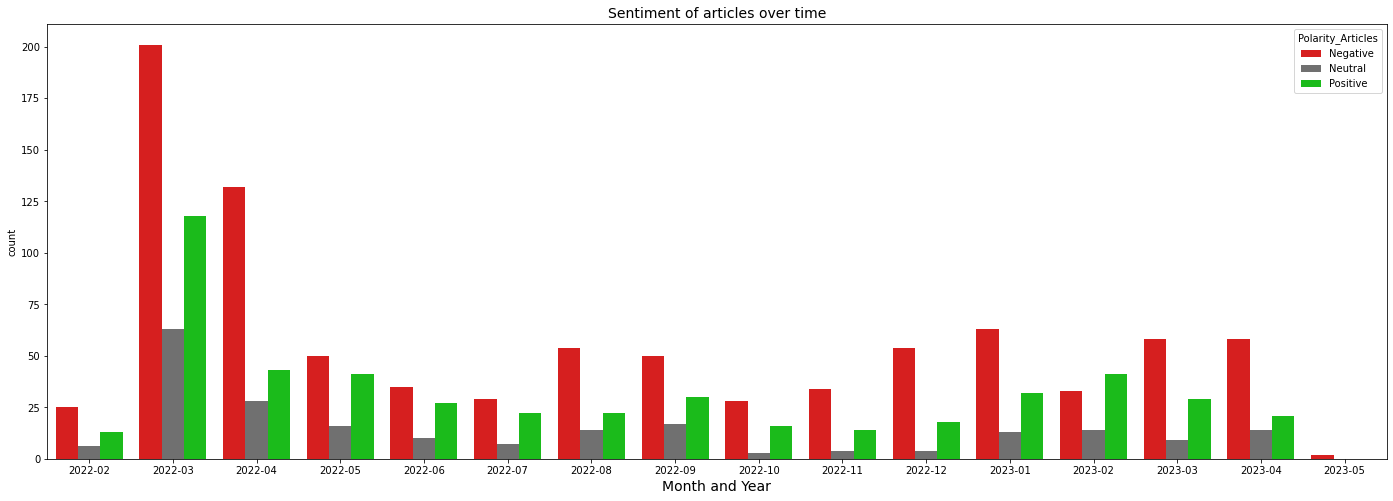

In [135]:
ds["MonthYear"] = ds["date"].apply(lambda x: x.strftime("%Y-%m"))

overTimeSentiment = ds.groupby([ds["MonthYear"], "Polarity_Articles"])[
    "Polarity_Articles"
].count()

overTimeSentiment = (
    pd.DataFrame(data=overTimeSentiment)
    .rename(columns={"Polarity_Articles": "count"})
    .reset_index()
)

# Visualising distribution of categorical variables
fig, ax = plt.subplots(1, 1, figsize=(24, 8))
_ = sns.barplot(
    x="MonthYear",
    y="count",
    hue="Polarity_Articles",
    data=overTimeSentiment,
    palette=colors,
)
_ = plt.xlabel("Month and Year", fontsize=14)
_ = plt.title("Sentiment of articles over time", fontsize=14)

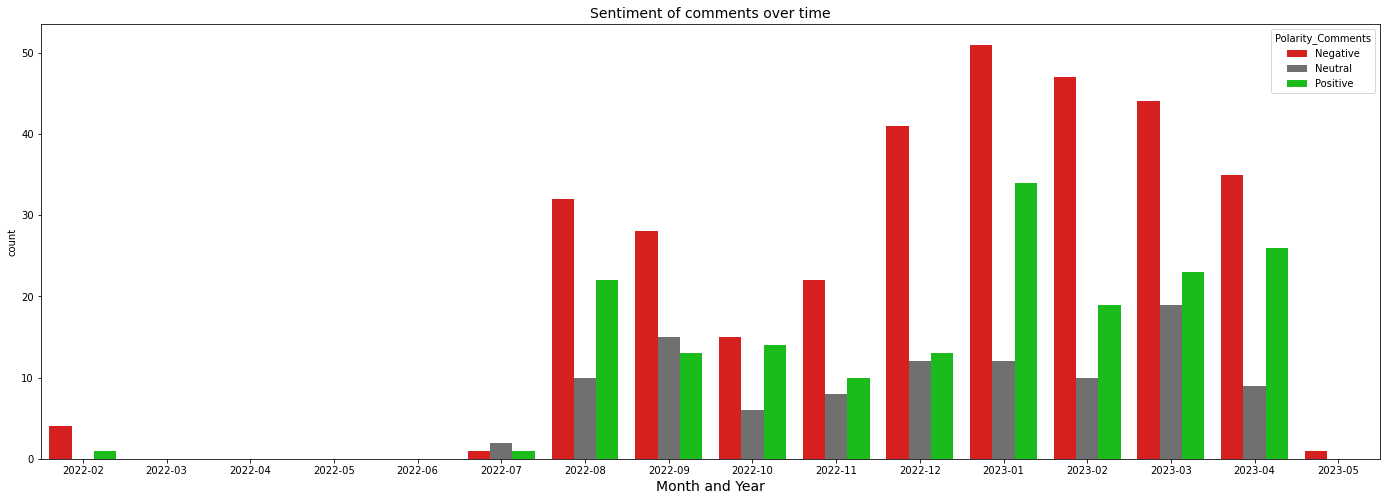

In [140]:
ds["MonthYear"] = ds["date"].apply(lambda x: x.strftime("%Y-%m"))

overTimeSentiment = ds.groupby([ds["MonthYear"], "Polarity_Comments"], sort=False)[
    "Polarity_Comments"
].count()

overTimeSentiment = (
    pd.DataFrame(data=overTimeSentiment)
    .rename(columns={"Polarity_Comments": "count"})
    .reset_index()
)

# Visualising distribution of categorical variables
fig, ax = plt.subplots(1, 1, figsize=(24, 8))
_ = sns.barplot(
    x="MonthYear",
    y="count",
    hue="Polarity_Comments",
    data=overTimeSentiment,
    palette=colors,
)
_ = plt.xlabel("Month and Year", fontsize=14)
_ = plt.title("Sentiment of comments over time", fontsize=14)